In [1]:
# Importing necessary libraries
import pandas as pd                     # For data manipulation and analysis
import matplotlib.pyplot as plt         # For plotting and visualizing data
import numpy as np                      # For numerical operations
import seaborn as sns                   # For statistical data visualization

# Importing TensorFlow and Keras for building neural network models

import tensorflow as tf                                                     # TensorFlow, for building and training ML models      
from tensorflow import keras                                                # Keras, high-level neural networks API 
from tensorflow.keras.layers import Dense, Activation, Dropout              # Layers to be used in the neural network model
from tensorflow.keras.optimizers import Adam                                # Optimizer for training the model
from tensorflow.keras.metrics import Accuracy                               # Metric to evaluate model performance
import matplotlib.pyplot as plt                                             

# Setting up Jupyter Notebook theme for matplotlib plots

from jupyterthemes import jtplot
jtplot.style(theme = 'monokai', context = 'notebook', ticks = True, grid = False)



In [2]:
# Load Dataset
bank_df = pd.read_csv('UniversalBank.csv')

In [3]:
bank_df.head(10) #printing the first 10 rows of the dataset

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


In [4]:
bank_df.tail(10) #printing the last 10 rows of the dataset


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4990,4991,55,25,58,95023,4,2.00,3,219,0,0,0,0,1
4991,4992,51,25,92,91330,1,1.90,2,100,0,0,0,0,1
4992,4993,30,5,13,90037,4,0.50,3,0,0,0,0,0,0
4993,4994,45,21,218,91801,2,6.67,1,0,0,0,0,1,0
4994,4995,64,40,75,94588,3,2.00,3,0,0,0,0,1,0
4995,4996,29,3,40,92697,1,1.90,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.40,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.30,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.50,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.80,1,0,0,0,0,1,1


In [5]:
bank_df.shape[0] #number of samples in UniversalBank.csv

5000

In [6]:
# Obtain dataframe info
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [7]:
# Obtain the statistical summary of the dataframe
bank_df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [8]:
# For better visualization
bank_df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [9]:
# total null values in the dataframe
bank_df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [10]:
# the average age in this dataset
average_age = bank_df['Age'].mean()
print(average_age)

45.3384


In [11]:
#the % of customers who have credit cards
credit_card_count = bank_df['CreditCard'].sum()
total_customers = bank_df.shape[0]
percentage_credit_card = (credit_card_count / total_customers)* 100
print(percentage_credit_card,'%')

29.4 %


In [12]:
#alternatively

CreditCardCustomers = bank_df[ bank_df['CreditCard'] == 1]
len(CreditCardCustomers)
CC_Customers_percent = len(CreditCardCustomers)/len(bank_df) *100
print(CC_Customers_percent,'%')

29.4 %


In [13]:
#the % of customers who accepted the personal loan
loan_acceptance_count = bank_df['Personal Loan'].sum()
percentage_loan_acceptance = (loan_acceptance_count / total_customers)*100
print(percentage_loan_acceptance, '%')

9.6 %


In [14]:
#alternatively
accepted_customers = bank_df[bank_df['Personal Loan']==1]
accepted_customers_percent = len(accepted_customers)/len(bank_df) * 100
print(accepted_customers_percent,'%') #The percentage of customers who accepted the personal loan

9.6 %


DATA VISUALIZATION

(5000, 14)


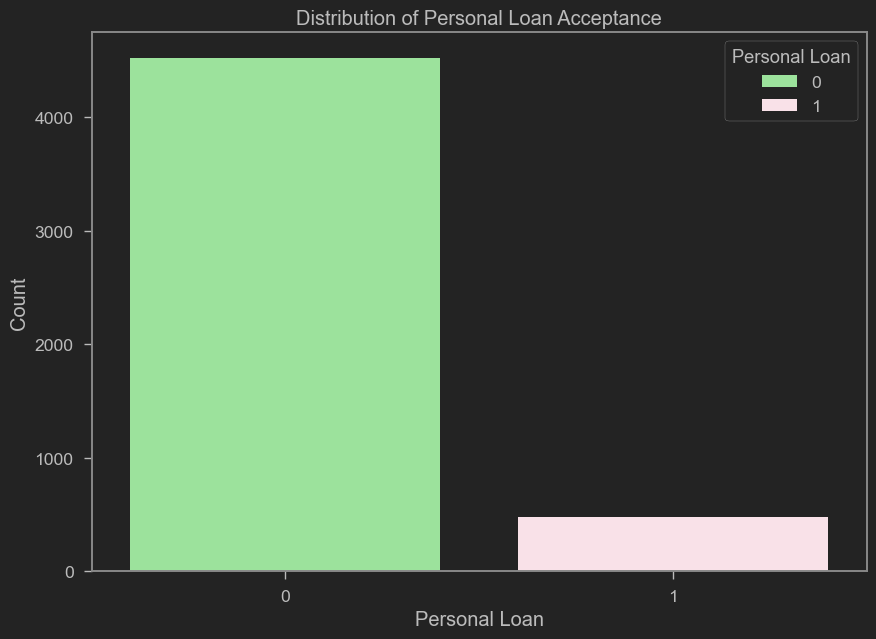

In [15]:
print(bank_df.shape)  # This will print the number of rows and columns in the DataFrame
plt.figure(figsize=(10, 7))
sns.countplot(x='Personal Loan', data=bank_df,hue='Personal Loan', palette=['#90ee90', '#fddde6']) 

plt.title('Distribution of Personal Loan Acceptance')
plt.xlabel('Personal Loan')
plt.ylabel('Count')

plt.show()


(5000, 14)
[1 2 3]


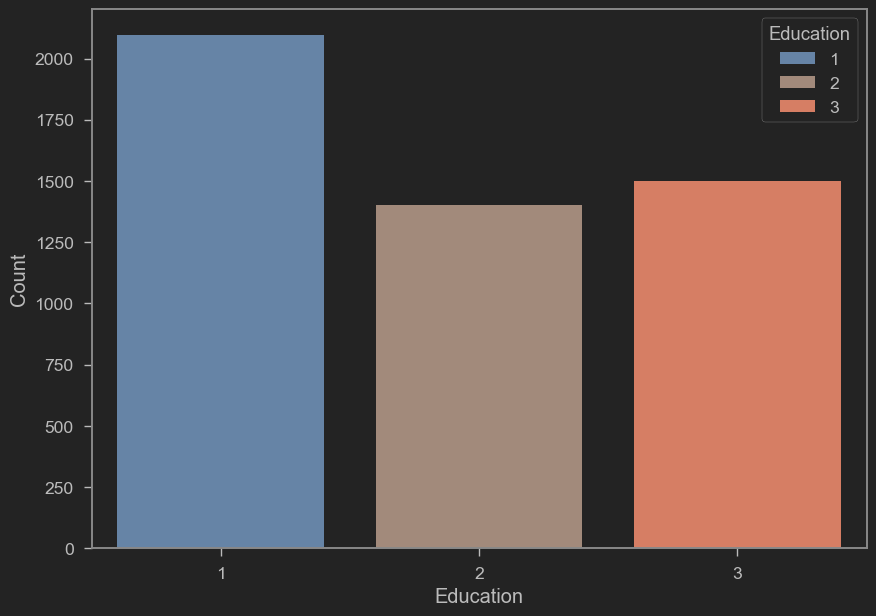

In [16]:
#Visualize Education feature
print(bank_df.shape) 
print(bank_df['Education'].unique()) 
plt.figure(figsize=(10, 7))
sns.countplot(x='Education', data=bank_df, hue='Education', palette=['#5B84B1FF', '#A88974FF', '#E97451FF']) 

plt.xlabel('Education')
plt.ylabel('Count')

plt.show()



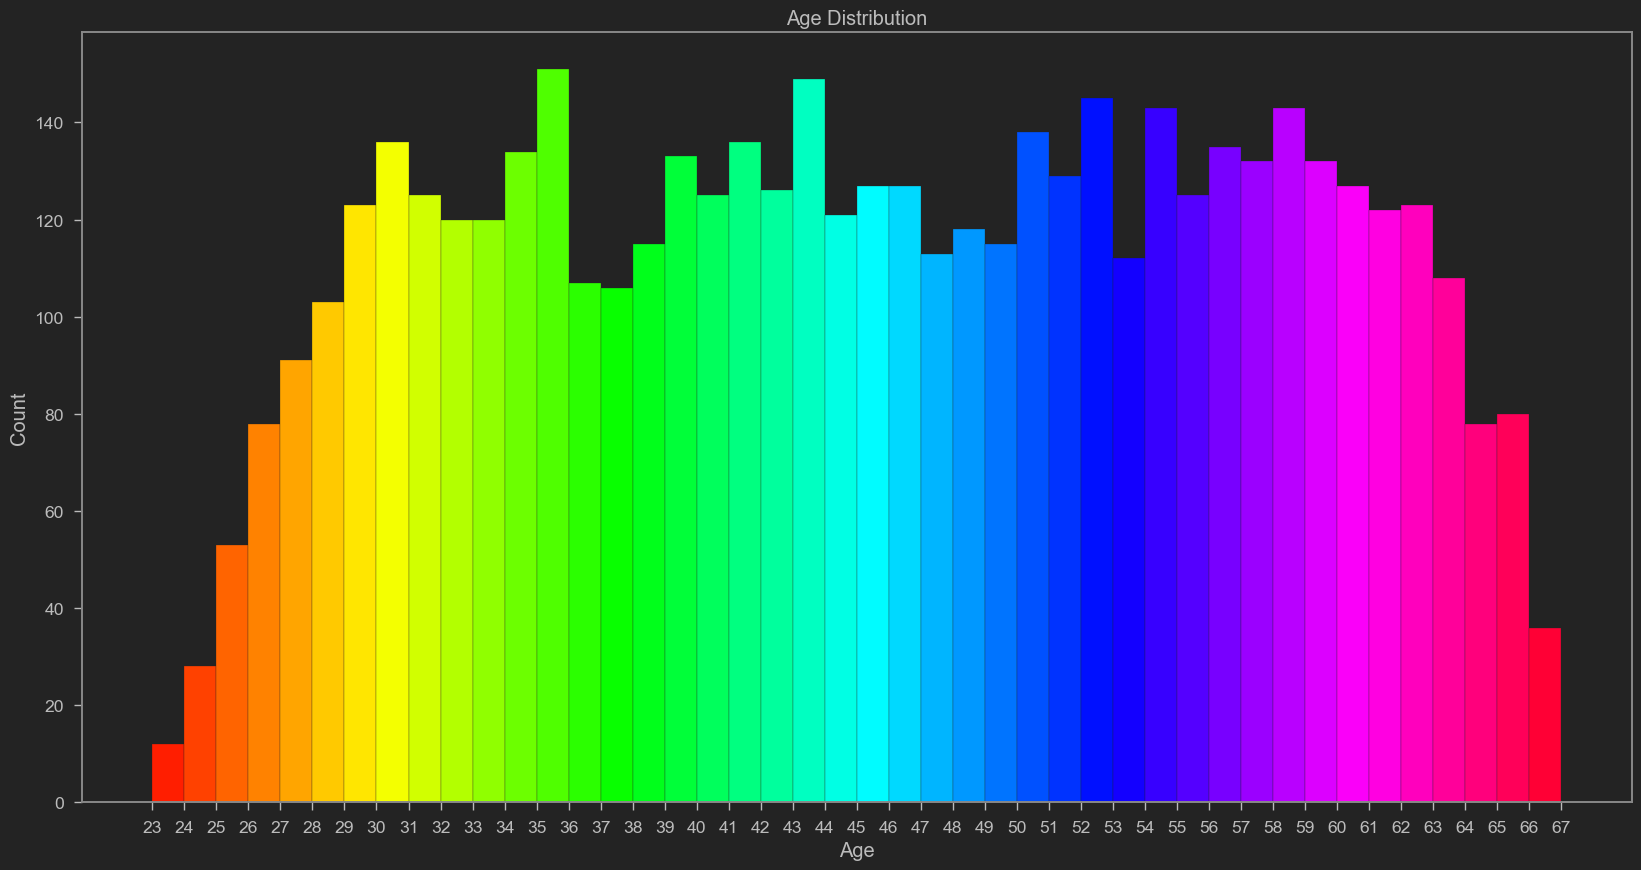

In [17]:
#Visualize Age
plt.figure(figsize=(20, 10))
bin_edges = range(int(bank_df['Age'].min()), int(bank_df['Age'].max()) + 1)
hist = sns.histplot(bank_df['Age'], bins=bin_edges, kde=False)

# Get the number of bins and use it to create a color palette
n_bins = len(hist.patches)
palette = sns.color_palette("hsv", n_bins)

# Apply the colors to each bar
for patch, color in zip(hist.patches, palette):
    patch.set_facecolor(color)

# Set the x-axis ticks to show every year
plt.xticks(range(int(bank_df['Age'].min()), int(bank_df['Age'].max()) + 1, 1))

# Set the title and labels of the histogram
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

C:\Users\Aryan\AppData\Local\Temp\ipykernel_31964\2139767527.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['No Credit Card', 'Has Credit Card'])  # Optionally set custom labels for the x-axis categories


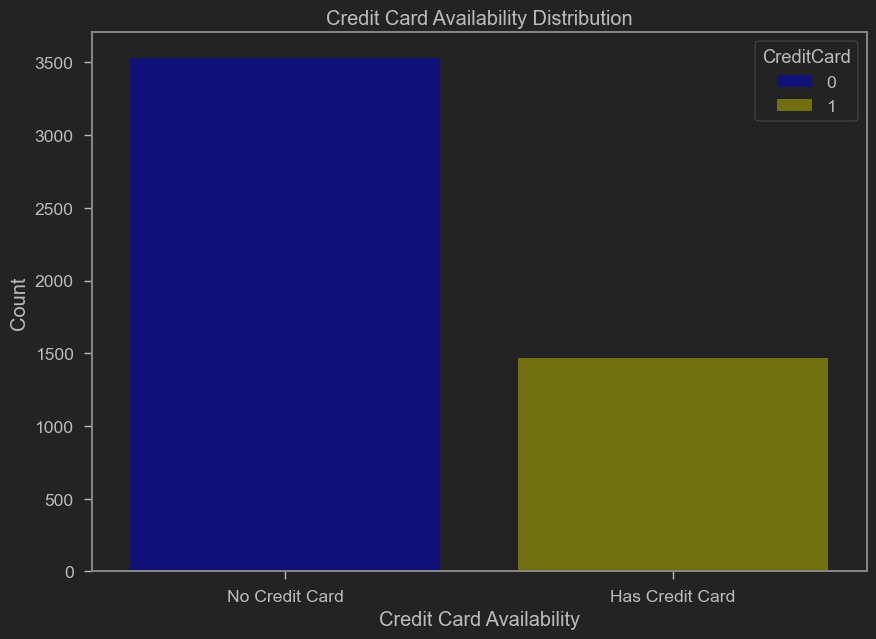

In [18]:
#Visualize credit card availability feature
plt.figure(figsize=(10,7))
ax = sns.countplot(x='CreditCard', data=bank_df, hue='CreditCard', palette=['#00008B', '#808000'])

# Set the title and labels of the countplot
ax.set_title('Credit Card Availability Distribution')
ax.set_xlabel('Credit Card Availability')
ax.set_ylabel('Count')
ax.set_xticklabels(['No Credit Card', 'Has Credit Card'])  # Optionally set custom labels for the x-axis categories

# Show the plot
plt.show()


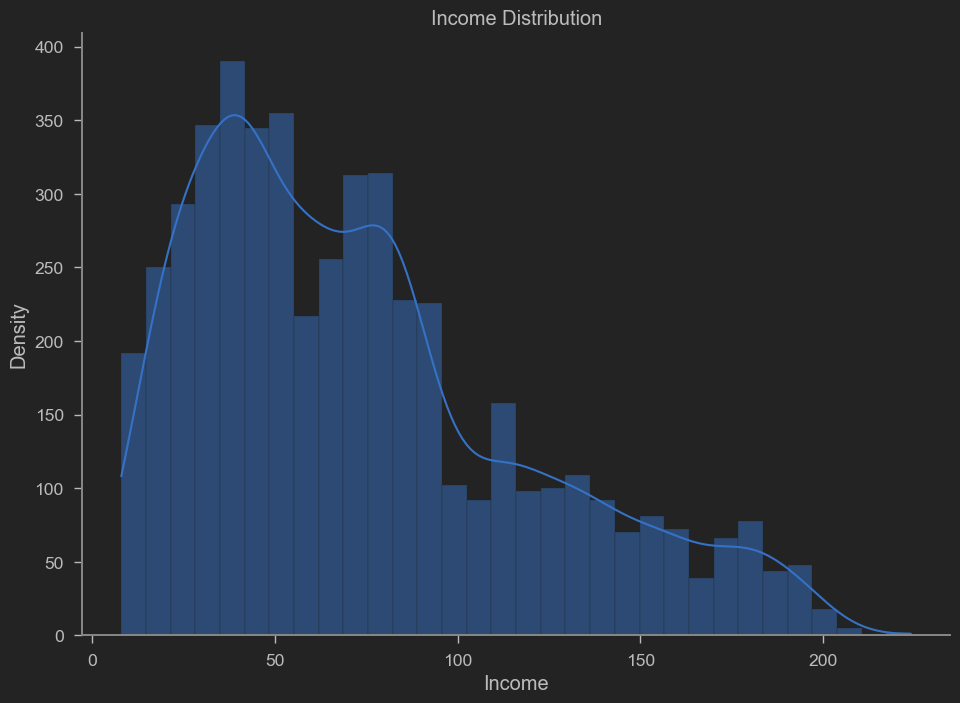

In [19]:
#Visualize income data
sns.displot(bank_df, x='Income', kind='hist', kde=True, height=7, aspect=1.4)

# Set the title and labels of the plot
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Density')

plt.show()


In [20]:
personalloans = bank_df[bank_df['Personal Loan'] == 1]
no_personalloans = bank_df[bank_df['Personal Loan'] == 0]

In [21]:
personalloans

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0
16,17,38,14,130,95010,4,4.7,3,134,1,0,0,0,0
18,19,46,21,193,91604,2,8.1,3,0,1,0,0,0,0
29,30,38,13,119,94104,1,3.3,2,0,1,0,1,1,1
38,39,42,18,141,94114,3,5.0,3,0,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,4884,38,13,129,92646,3,4.1,3,0,1,0,1,1,1
4927,4928,43,19,121,94720,1,0.7,2,0,1,0,1,1,1
4941,4942,28,4,112,90049,2,1.6,2,0,1,0,0,1,0
4962,4963,46,20,122,90065,3,3.0,3,0,1,0,1,1,1


In [22]:
personalloans.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.0,480.000000,480.000000,480.00000,480.000000
mean,2390.650000,45.066667,19.843750,144.745833,93153.202083,2.612500,3.905354,2.233333,100.845833,1.0,0.125000,0.291667,0.60625,0.297917
std,1394.393674,11.590964,11.582443,31.584429,1759.223753,1.115393,2.097681,0.753373,160.847862,0.0,0.331064,0.455004,0.48909,0.457820
min,10.000000,26.000000,0.000000,60.000000,90016.000000,1.000000,0.000000,1.000000,0.000000,1.0,0.000000,0.000000,0.00000,0.000000
25%,1166.500000,35.000000,9.000000,122.000000,91908.750000,2.000000,2.600000,2.000000,0.000000,1.0,0.000000,0.000000,0.00000,0.000000
50%,2342.000000,45.000000,20.000000,142.500000,93407.000000,3.000000,3.800000,2.000000,0.000000,1.0,0.000000,0.000000,1.00000,0.000000
75%,3566.000000,55.000000,30.000000,172.000000,94705.500000,4.000000,5.347500,3.000000,192.500000,1.0,0.000000,1.000000,1.00000,1.000000
max,4981.000000,65.000000,41.000000,203.000000,96008.000000,4.000000,10.000000,3.000000,617.000000,1.0,1.000000,1.000000,1.00000,1.000000


In [23]:
no_personalloans

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [24]:
no_personalloans.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,4520.000000,4520.000000,4520.000000,4520.000000,4520.000000,4520.000000,4520.000000,4520.000000,4520.000000,4520.0,4520.000000,4520.000000,4520.000000,4520.000000
mean,2512.165487,45.367257,20.132301,66.237389,93152.428761,2.373451,1.729009,1.843584,51.789381,0.0,0.102212,0.035841,0.595796,0.293584
std,1448.299331,11.450427,11.456672,40.578534,2156.949654,1.148771,1.567647,0.839975,92.038931,0.0,0.302961,0.185913,0.490792,0.455454
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,1259.750000,35.000000,10.000000,35.000000,91911.000000,1.000000,0.600000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
50%,2518.500000,45.000000,20.000000,59.000000,93437.000000,2.000000,1.400000,2.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000
75%,3768.250000,55.000000,30.000000,84.000000,94608.000000,3.000000,2.300000,3.000000,98.000000,0.0,0.000000,0.000000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,8.800000,3.000000,635.000000,0.0,1.000000,1.000000,1.000000,1.000000


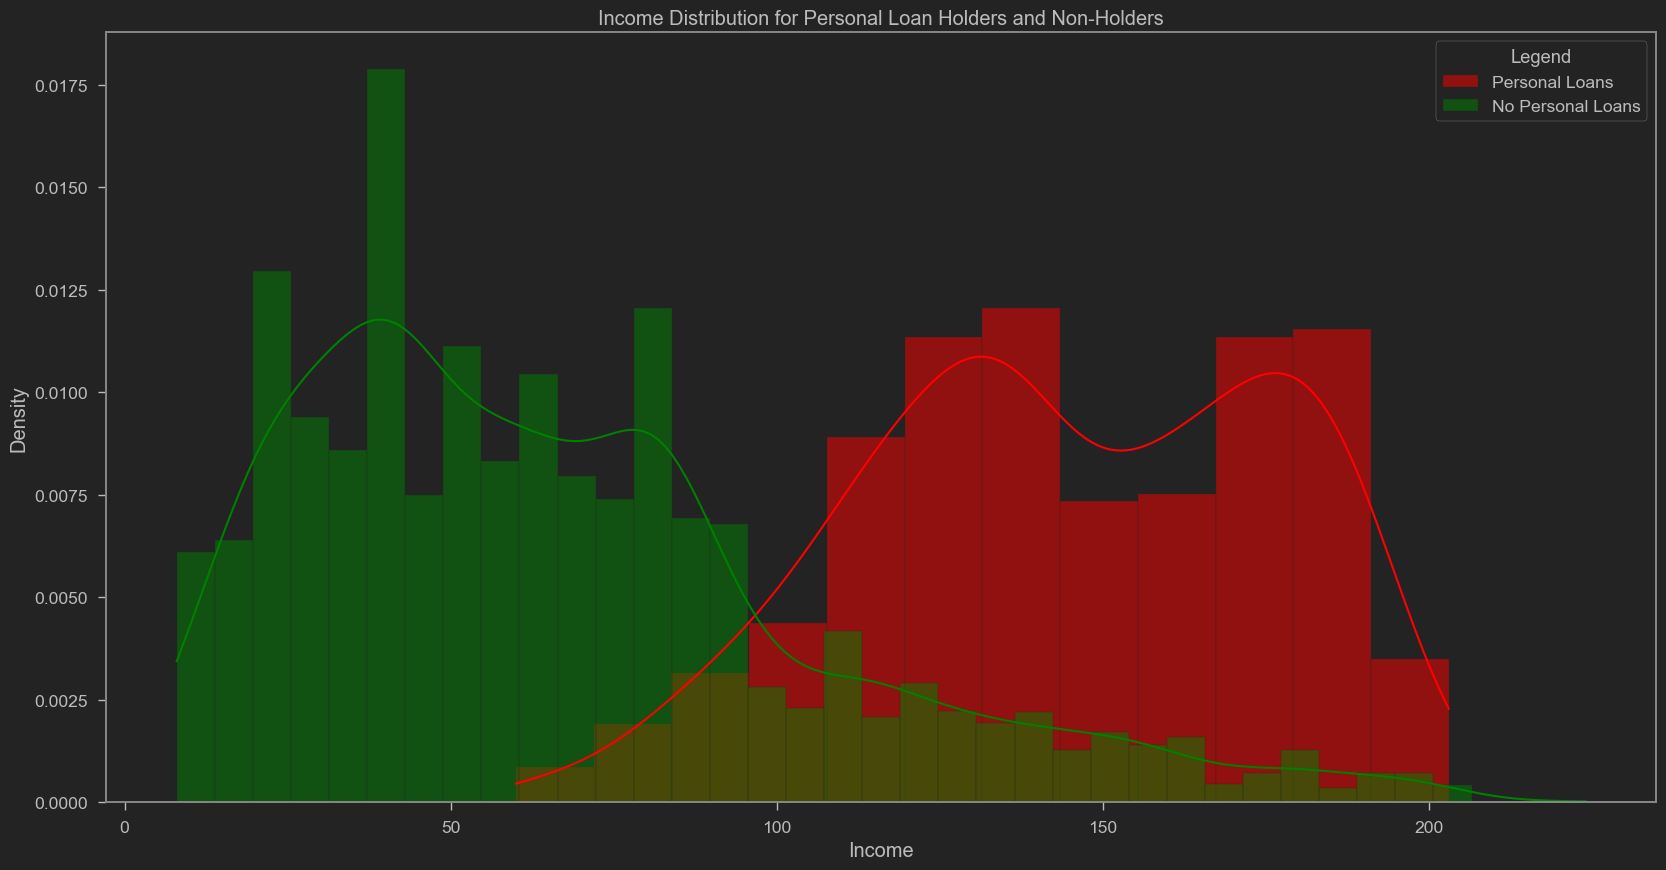

In [25]:
# Create a figure with specified size
plt.figure(figsize=(20, 10))

# Plot the histogram and KDE for individuals with personal loans
sns.histplot(personalloans['Income'], color='red', kde=True, stat='density', label='Personal Loans', alpha=0.5)

# Plot the histogram and KDE for individuals without personal loans
sns.histplot(no_personalloans['Income'], color='green', kde=True, stat='density', label='No Personal Loans', alpha=0.5)

# Add legend to the plot
plt.legend(title='Legend')

# Add a title and labels to the plot
plt.title('Income Distribution for Personal Loan Holders and Non-Holders')
plt.xlabel('Income')
plt.ylabel('Density')

# Show the plot
plt.show()

<Figure size 3000x3000 with 0 Axes>

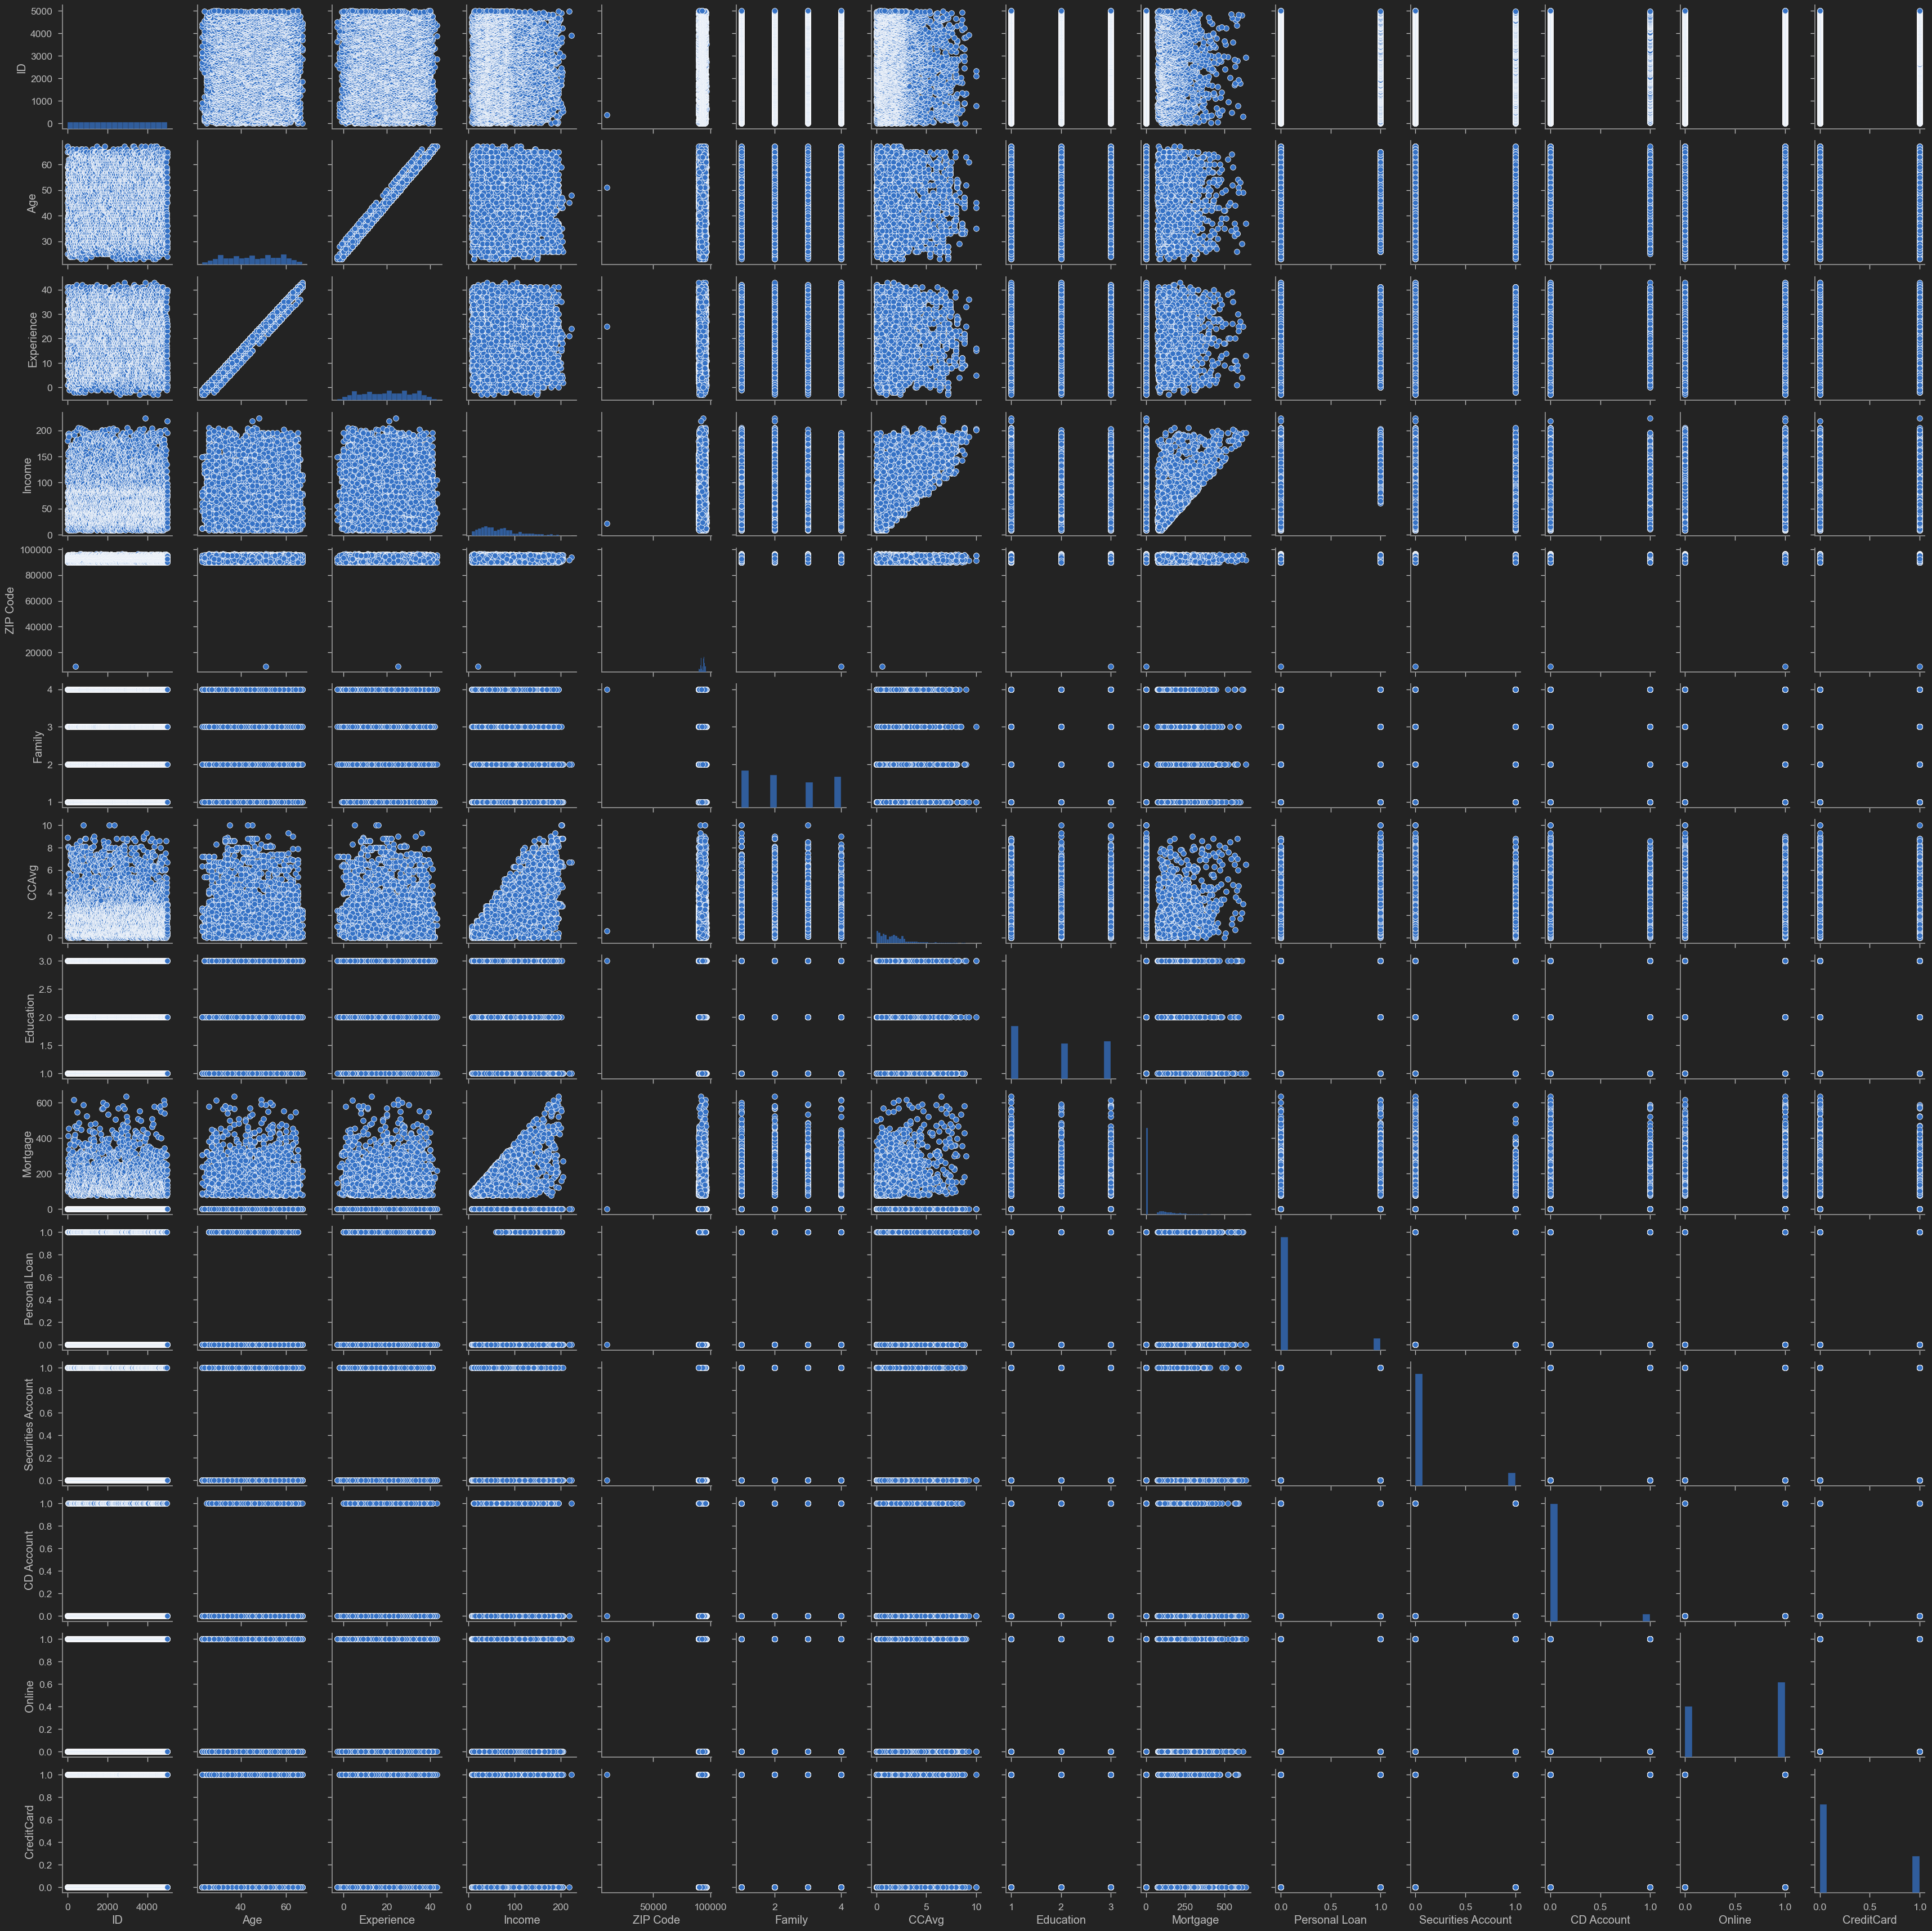

In [26]:
plt.figure(figsize= (30, 30))
sns.pairplot(bank_df)

<Axes: >

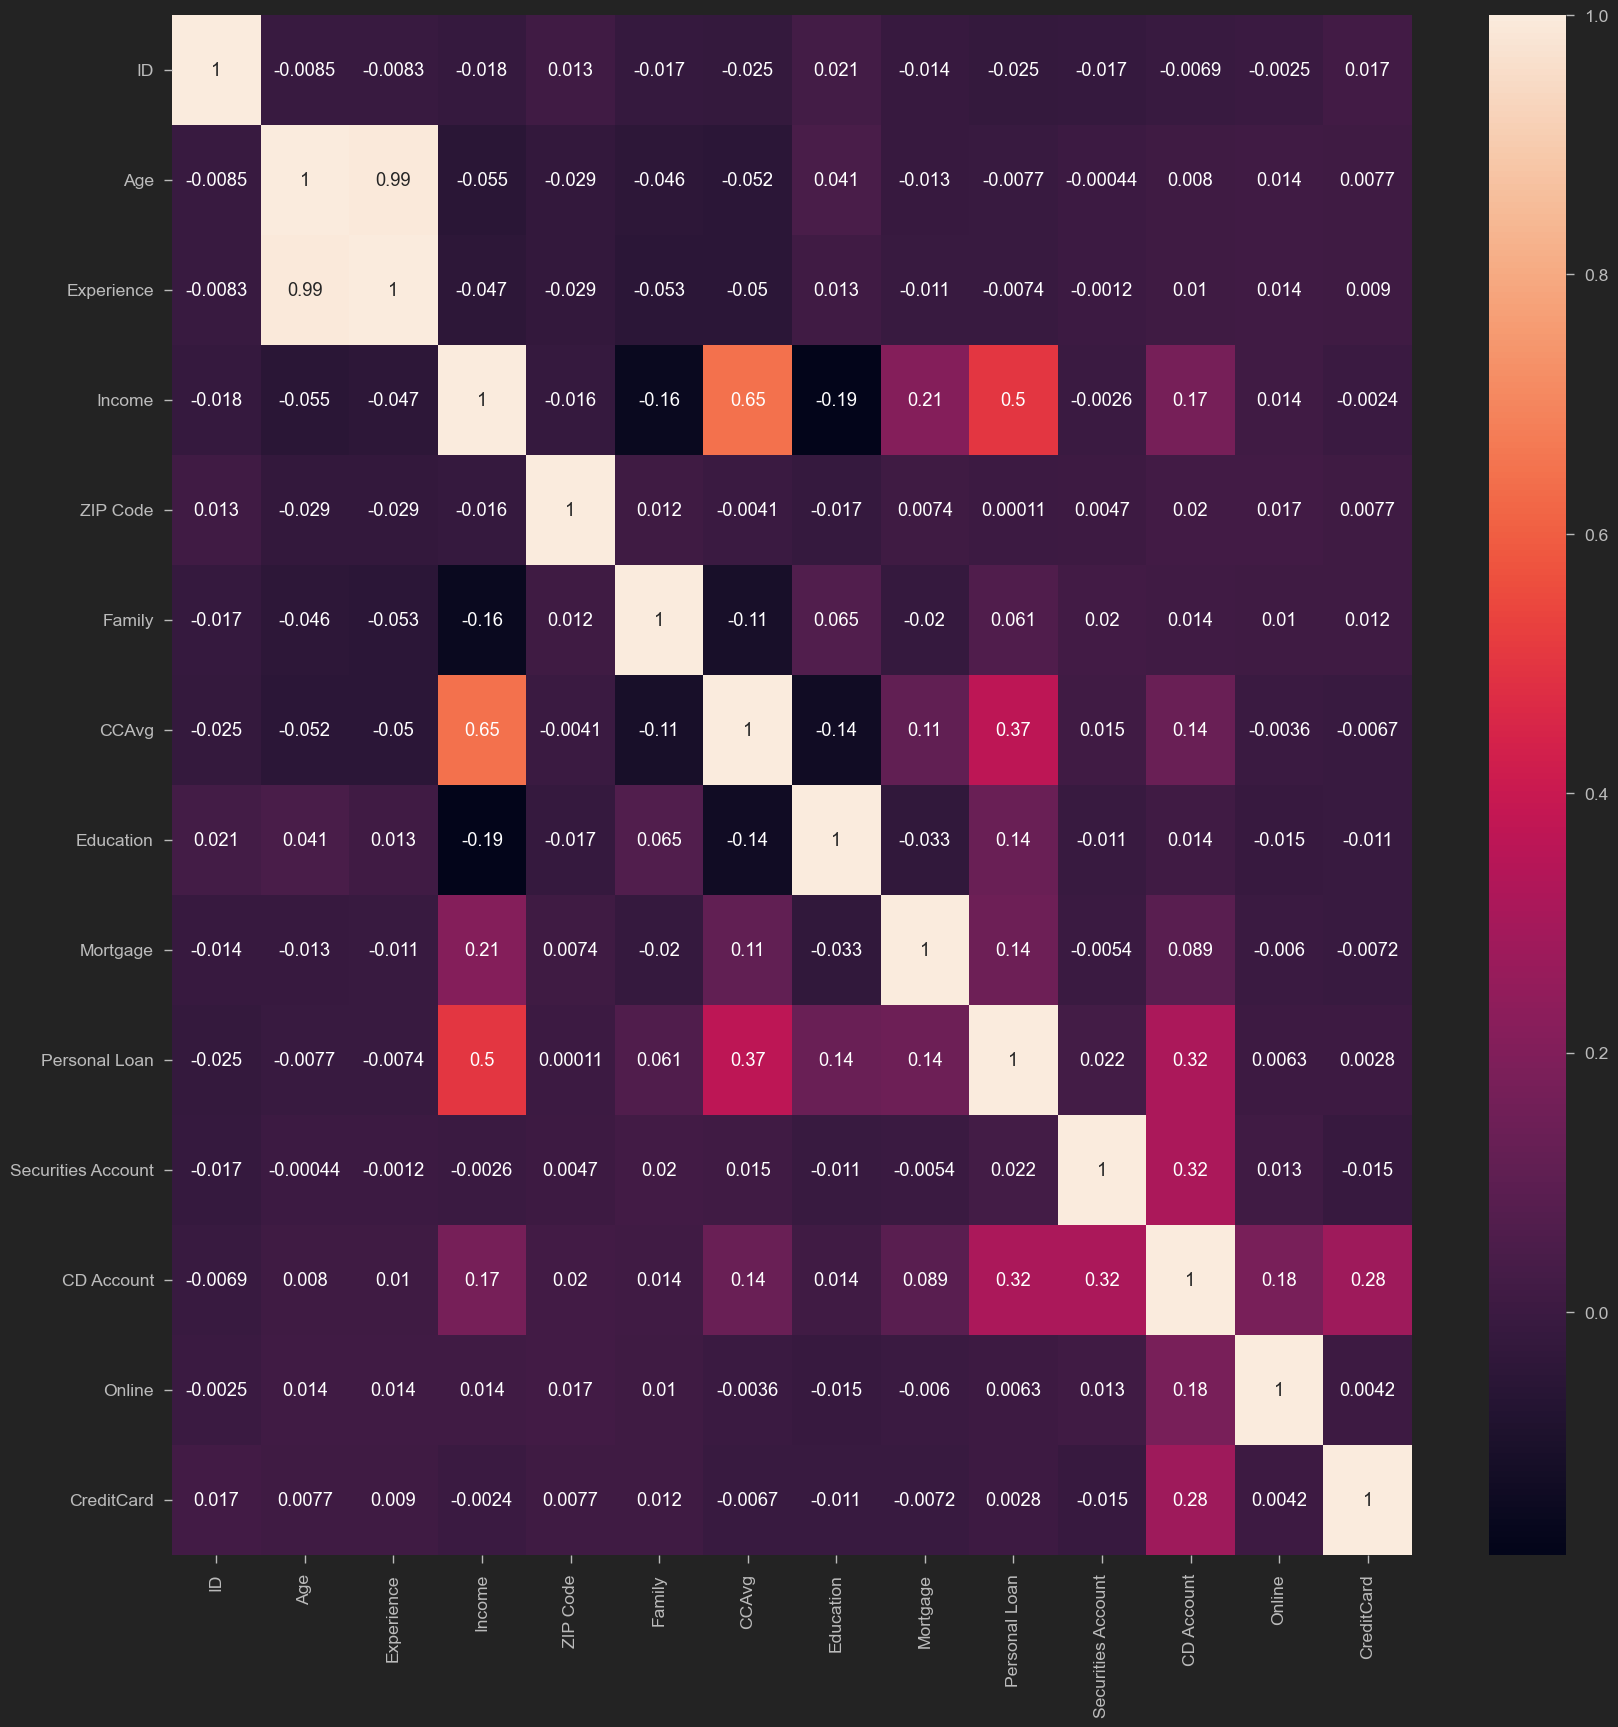

In [27]:
plt.figure (figsize=(20, 20))
cm = bank_df.corr()
sns.heatmap(cm, annot = True)

<Figure size 2000x1000 with 0 Axes>

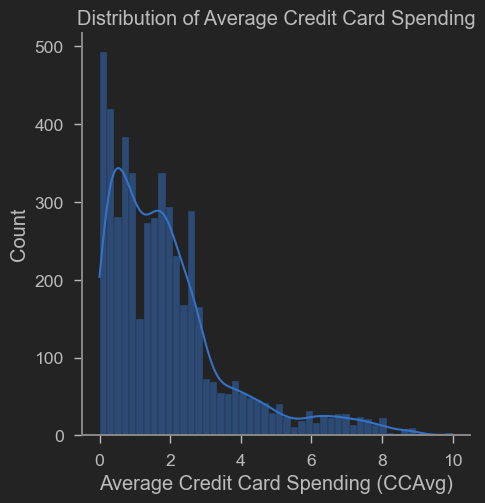

In [28]:
plt.figure(figsize=(20, 10))
sns.displot(bank_df['CCAvg'], kde=True)

# Set the title and labels of the plot
plt.title('Distribution of Average Credit Card Spending')
plt.xlabel('Average Credit Card Spending (CCAvg)')
plt.ylabel('Count')

# Adjust the height and aspect ratio as needed
plt.show()

C:\Users\Aryan\AppData\Local\Temp\ipykernel_31964\2417820857.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(personalloans['CCAvg'], color = 'g', kde = True)
C:\Users\Aryan\AppData\Local\Temp\ipykernel_31964\2417820857.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(no_personalloans['CCA

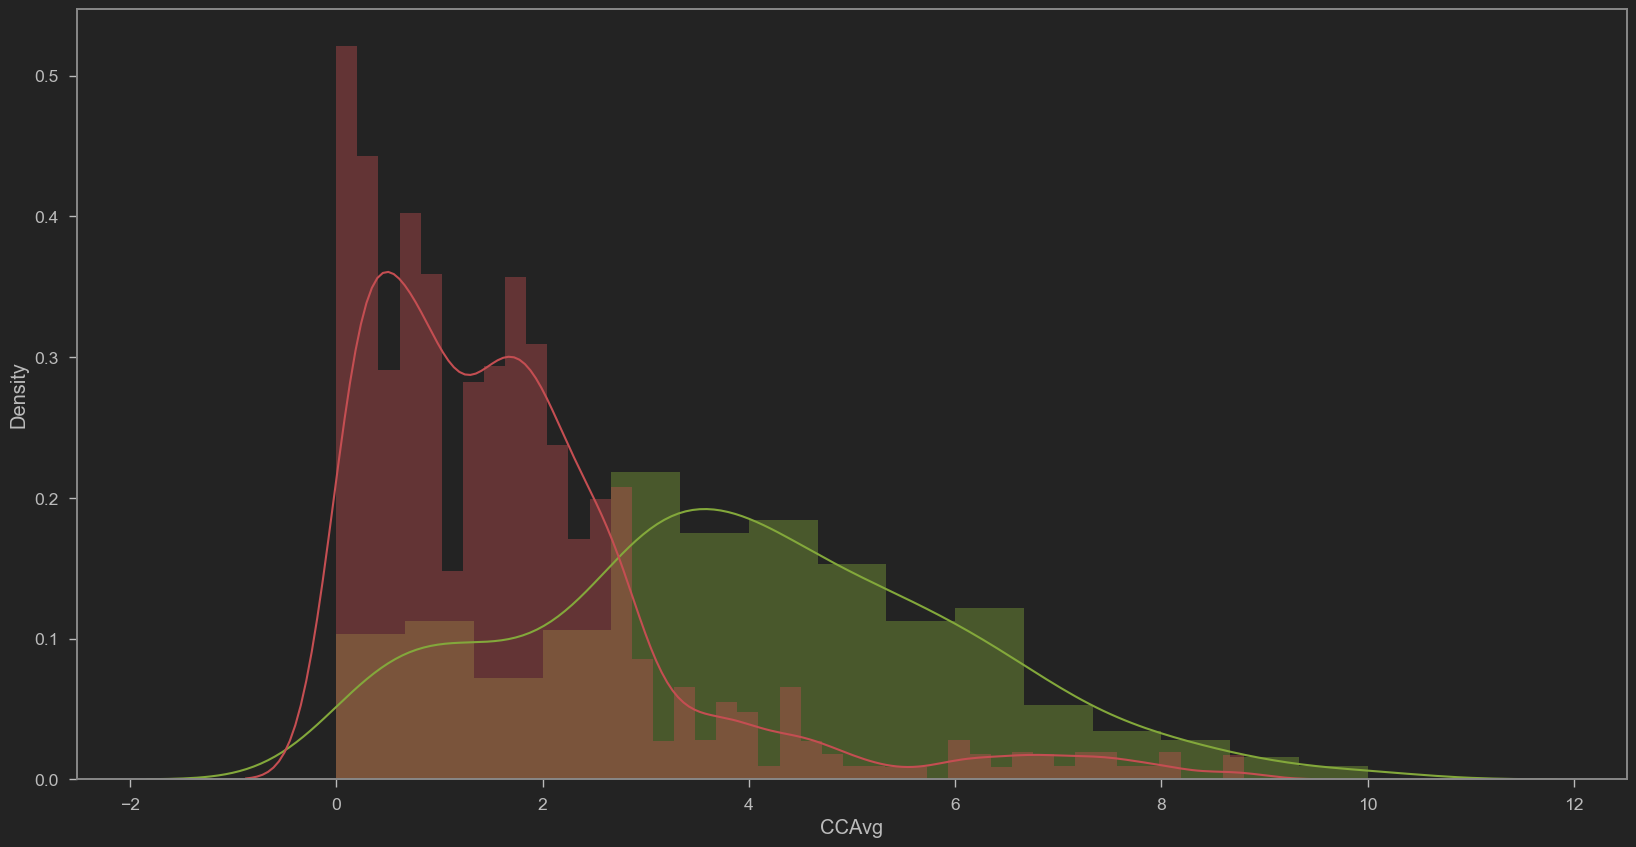

In [29]:
plt.figure(figsize=(20,10))
sns.distplot(personalloans['CCAvg'], color = 'g', kde = True)
sns.distplot(no_personalloans['CCAvg'], color='r', kde = True)

plt.show()

Prepare the Data before training of the Machine Learning Model

In [30]:
bank_df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [31]:
X = bank_df.drop(columns=['Personal Loan'])
X

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,1,0


In [32]:
y = bank_df['Personal Loan']                #Model Output
y

0       0
1       0
2       0
3       0
4       0
       ..
4995    0
4996    0
4997    0
4998    0
4999    0
Name: Personal Loan, Length: 5000, dtype: int64

In [33]:
from tensorflow.keras.utils import to_categorical
y=to_categorical(y)
y

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [34]:

#scale the data before training the model

from sklearn import metrics
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler_x = StandardScaler()
X = scaler_x.fit_transform(X)

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [36]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4500, 13), (500, 13), (4500, 2), (500, 2))

Mini Challenge #4

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [38]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3500, 13), (1500, 13), (3500, 2), (1500, 2))

BUILDING A SIMPLE MULTILAYER ARTIFICIAL NEURAL NETWORK MODEL

In [40]:
#Create keras sequential model
ANN_model = keras.Sequential()

#Add dense layer
ANN_model.add(Dense(250, input_dim = 13, kernel_initializer = 'normal', activation = 'relu')) 

ANN_model.add(Dropout(0.3))
ANN_model.add(Dense(500, activation = 'relu' ))

ANN_model.add(Dropout(0.3))
ANN_model.add(Dense(500, activation = 'relu' ))

ANN_model.add(Dropout(0.3))
ANN_model.add(Dense(500, activation = 'relu' ))

ANN_model.add(Dropout(0.4))
ANN_model.add(Dense(250, activation = 'linear' ))


ANN_model.add(Dropout(0.4))



#Add dense layer with software activation
ANN_model.add(Dense(2, activation = 'softmax'))
ANN_model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 250)               3500      
                                                                 
 dropout (Dropout)           (None, 250)               0         
                                                                 
 dense_2 (Dense)             (None, 500)               125500    
                                                                 
 dropout_1 (Dropout)         (None, 500)               0         
                                                                 
 dense_3 (Dense)             (None, 500)               250500    
                                                                 
 dropout_2 (Dropout)         (None, 500)               0         
                                                                 
 dense_4 (Dense)             (None, 500)              